<a href="https://colab.research.google.com/github/netonakano/imersao_python/blob/main/%5BImers%C3%A3o_Python%5D_Aula_05_PETRO3_BR_PREDITIVO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from prophet import Prophet

O Prophet é uma ferramenta desenvolvida pelo Facebook para fazer previsões em séries temporais, que são basicamente dados coletados ao longo do tempo, como os preços das ações. É famoso por ser fácil de usar e por funcionar bem mesmo com poucos dados ou com dados que possuem padrões irregulares, o que é comum no mercado de ações.

Vamos usar dados de ações da empresa Johnson & Johnson como exemplo.

Aqui, usamos um comando para baixar os dados. É como se estivéssemos pedindo à internet para nos dar os preços das ações da Johnson & Johnson desde 2020 até o final de 2023. Fácil, né?

In [2]:
# Baixar dados dos últimos quatro anos para uma ação específica
dados = yf.download("PETR3.SA", start="2020-01-01", end="2023-12-31", progress=False)
dados = dados.reset_index()

Agora, dividimos nossos dados em duas partes: uma para treinar nosso 'adivinho' digital, que é até julho de 2023, e outra para testar nossas previsões, que é o restante do ano.

In [3]:
# Vamos dividir os dados em treino (até o final do primeiro semestre de 2023) e teste (segundo semestre de 2023)
dados_treino = dados[dados['Date'] < '2023-07-31']
dados_teste = dados[dados['Date'] >= '2023-07-31']

In [4]:
# Preparando os dados para o FBProphet
dados_prophet_treino = dados_treino[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

O próximo passo é preparar os dados para o nosso adivinho, o Prophet. É como se estivéssemos arrumando os dados para que ele entenda o que estamos perguntando.

Depois, criamos o modelo do Prophet. Aqui, estamos dizendo ao Prophet para considerar padrões semanais e anuais nos dados, mas não diários. E também adicionamos feriados dos EUA, já que eles podem influenciar o preço das ações.

In [5]:
# Criar e treinar o modelo
modelo = Prophet(weekly_seasonality=True,
        yearly_seasonality=True,
        daily_seasonality=False)

modelo.add_country_holidays(country_name='BR')

modelo.fit(dados_prophet_treino)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpntos086o/42m4pwsh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpntos086o/eyi54ie6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56988', 'data', 'file=/tmp/tmpntos086o/42m4pwsh.json', 'init=/tmp/tmpntos086o/eyi54ie6.json', 'output', 'file=/tmp/tmpntos086o/prophet_modelklk1pbco/prophet_model-20240329115227.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:52:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:52:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Agora, a parte mágica! Pedimos ao Prophet para prever o futuro, até o final de 2023. E então, plotamos um gráfico para ver como nossa previsão se compara com os dados reais.

In [6]:
# Criar datas futuras para previsão até o final de 2023
futuro = modelo.make_future_dataframe(periods=150)
previsao = modelo.predict(futuro)

Neste gráfico, vocês verão três linhas. A azul mostra o preço real das ações até julho de 2023, a verde mostra os preços reais após essa data, e a laranja mostra o que o Prophet previu. A linha vermelha pontilhada marca onde começam as previsões.

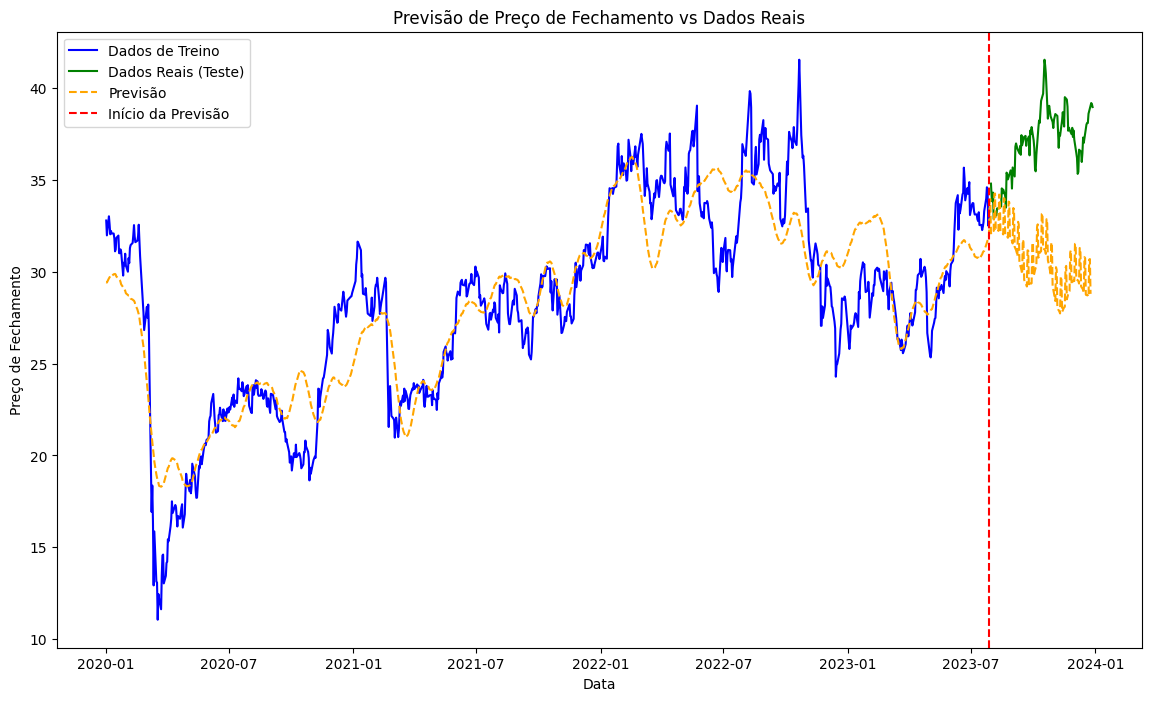

In [7]:
# Plotar os dados de treino, teste e previsões
plt.figure(figsize=(14, 8))
plt.plot(dados_treino['Date'], dados_treino['Close'], label='Dados de Treino', color='blue')
plt.plot(dados_teste['Date'], dados_teste['Close'], label='Dados Reais (Teste)', color='green')
plt.plot(previsao['ds'], previsao['yhat'], label='Previsão', color='orange', linestyle='--')

plt.axvline(dados_treino['Date'].max(), color='red', linestyle='--', label='Início da Previsão')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.title('Previsão de Preço de Fechamento vs Dados Reais')
plt.legend()
plt.show()